# **Boosting Techniques | Vikash Kumar | wiryvikash15@gmail.com**

**1. What is Boosting in Machine Learning? Explain how it improves weak learners.**

Boosting is an ensemble learning technique that combines multiple simple models, known as weak learners, to create a single, highly accurate model, or strong learner. Unlike bagging methods that build models in parallel, boosting builds them sequentially.

The core idea is that each new model in the sequence focuses on correcting the mistakes made by its predecessors. Here's how it improves weak learners:

- Iterative Learning: The process starts by training a simple weak learner (e.g., a shallow decision tree) on the original dataset.

- Focus on Errors: The algorithm then analyzes the errors of this first model. It identifies the data points that were misclassified and gives them higher importance or weight.

- Sequential Correction: A second weak learner is trained, but now it pays more attention to the previously misclassified, high-weight data points. It essentially tries to fix the errors of the first model.

- Aggregation: This process is repeated for a specified number of iterations. Each subsequent model is built to correct the remaining errors of the ensemble of models built so far.

Finally, all the weak learners are combined into a single strong learner. The final prediction is typically a weighted vote of all the models, where better-performing models are given a greater say. By forcing the models to focus on the hardest-to-classify examples, the final ensemble becomes exceptionally accurate and robust.

**2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

AdaBoost (Adaptive Boosting) and Gradient Boosting are two foundational boosting algorithms, but they differ significantly in how they correct the mistakes of previous learners.

**AdaBoost (Adaptive Boosting)**
- Error Correction Method: It adjusts the weights of the data points. Misclassified samples get higher weights, forcing the next model to focus on them.

- Model Influence:	The final prediction is a weighted sum of all weak learners. Each model's weight is determined by its overall accuracy during its training stage.

- Core Idea:	High-weight samples are "harder" to classify correctly.

- Mathematical Analogy:	Can be seen as an additive model that minimizes an exponential loss function.

**Gradient Boosting**

- It fits the next model to the residual errors of the previous model's predictions. Each new model directly tries to predict the error of the current ensemble.

- Each new model contributes to correcting the overall error, but there isn't an explicit weight assigned in the same way. The models are simply added together, scaled by a learning rate.

- The residual represents the "unexplained" part of the target, which the next model tries to explain.

- A more generalized approach that uses gradient descent to minimize a given loss function (e.g., Mean Squared Error for regression, Log Loss for classification).


In short, AdaBoost updates the dataset's sample weights, while Gradient Boosting updates the target values (residuals) for the next model to learn from.

**3. How does regularization help in XGBoost?**

Regularization is a key feature in XGBoost (Extreme Gradient Boosting) that helps prevent overfitting and improves the model's ability to generalize to new data. XGBoost includes regularization terms directly in its objective function, which the algorithm tries to minimize.

It uses two types of regularization:

- **L1 Regularization (Lasso Regression):** Controlled by the alpha hyperparameter. It adds a penalty equal to the absolute value of the magnitude of the leaf weights. This can shrink some leaf weights to exactly zero, effectively performing a form of feature selection by pruning less important branches.

- **L2 Regularization (Ridge Regression):** Controlled by the lambda hyperparameter. It adds a penalty equal to the square of the magnitude of the leaf weights. This encourages the weights to be small and distributed more evenly, preventing any single tree from having too much influence.

In addition to L1/L2, the gamma hyperparameter acts as another form of regularization by specifying the minimum loss reduction required to make a further partition on a leaf node. If a split does not reduce the loss by at least gamma, it will not be made.

By penalizing model complexity, regularization forces XGBoost to build simpler trees, making the final model less likely to memorize the noise in the training data and more likely to capture the true underlying patterns.

**4. Why is CatBoost considered efficient for handling categorical data?**

CatBoost (Categorical Boosting) is highly efficient for datasets with many categorical features due to its novel, built-in algorithms for processing them. Standard methods like one-hot encoding can lead to an explosion of features (the "curse of dimensionality"), while simple target encoding can suffer from target leakage.

CatBoost solves the problems with two key innovations:

- **Ordered Target Encoding (Ordered TS):** This is a sophisticated version of target encoding. Instead of using the entire dataset to calculate the target mean for a category, it uses only the data points that appear before the current one in a randomly shuffled dataset. This prevents the model from "peeking" at the target value of the observation it is trying to predict, thus avoiding target leakage.

- **Categorical Feature Combinations:** CatBoost automatically generates combinations of categorical features (e.g., combining "City" and "Product Type") to capture high-order interactions that might otherwise be missed. This is done greedily during training without requiring manual feature engineering.

These built-in, optimized methods mean data scientists don't have to perform extensive preprocessing on categorical features, saving time and often leading to better model performance right out of the box.

**5. What are some real-world applications where boosting techniques are preferred over bagging methods?**

Boosting techniques are generally preferred over bagging methods (like Random Forest) in applications where maximum predictive accuracy is the primary goal, even if it comes at the cost of higher computational expense or more difficult tuning.

Here are some real-world applications where boosting often shines:

- Credit Scoring and Loan Default Prediction: In finance, the cost of a misclassification (e.g., approving a loan that defaults) is very high. Boosting's ability to minimize bias and create highly accurate models is critical for managing financial risk.

- Fraud Detection: Identifying fraudulent transactions in real-time is an imbalanced classification problem where accuracy is paramount. Boosting models excel at finding the subtle, complex patterns that distinguish fraudulent activity from legitimate behavior.

- Ad Click-Through Rate (CTR) Prediction: In online advertising, accurately predicting whether a user will click on an ad is crucial for revenue. Boosting models are industry standard for this task due to their high performance on large, sparse datasets with many categorical features.

- Medical Diagnosis: When predicting the presence of a disease, the model's ability to correctly identify positive cases (high recall and precision) is vital. Boosting's focus on hard-to-classify cases helps improve diagnostic accuracy.

- Search Engine Ranking: Companies like Google and Bing use gradient boosting variants (like LambdaMART) to rank search results, as the model needs to be extremely precise to deliver the most relevant results at the top.

In these scenarios, the sequential, error-correcting nature of boosting allows it to achieve a lower error rate than bagging, which focuses more on reducing variance and providing a stable, but potentially less accurate, model.

**6. Write a Python program to:**

**-  Train an AdaBoost Classifier on the Breast Cancer dataset**

**- Print the model accuracy**

In [1]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# n_estimators=100 weak learners (decision trees by default)
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)

y_pred = ada_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Model Accuracy: {accuracy:.4f}")

AdaBoost Classifier Model Accuracy: 0.9708


**7. Write a Python program to:**

**- Train a Gradient Boosting Regressor on the California Housing dataset**

**- Evaluate performance using R-squared score**

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared score: {r2:.4f}")

Gradient Boosting Regressor R-squared score: 0.7803


**8. Write a Python program to:**

**- Train an XGBoost Classifier on the Breast Cancer dataset**

**- Tune the learning rate using GridSearchCV**

**- Print the best parameters and accuracy**

In [3]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# hyperparameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
print("Running GridSearchCV to find the best learning rate...")
grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"\nFinal accuracy of the tuned XGBoost model: {final_accuracy:.4f}")

Running GridSearchCV to find the best learning rate...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best parameters found:
{'learning_rate': 0.3}

Final accuracy of the tuned XGBoost model: 0.9649


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:35:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**9. Write a Python program to:**

**- Train a CatBoost Classifier**

**- Plot the confusion matrix using seaborn**

In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


CatBoost Classifier Accuracy: 0.9766



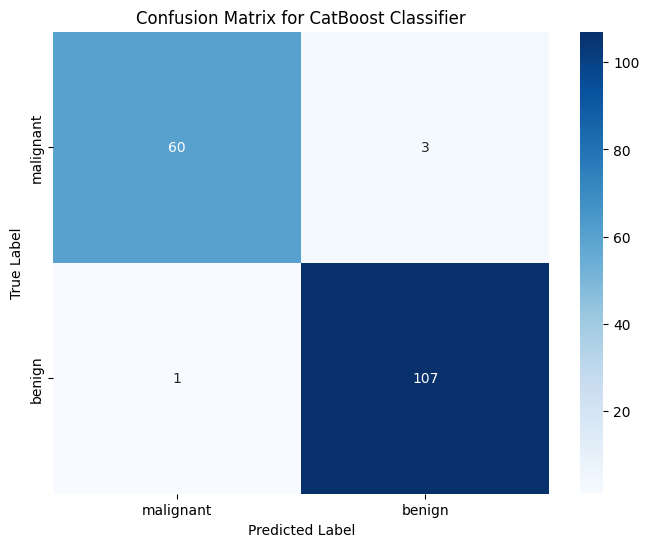

In [6]:
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
class_names = cancer.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# verbose=0 suppresses the training output
cat_classifier = cb.CatBoostClassifier(iterations=200, learning_rate=0.1, depth=3, random_state=42, verbose=0)
cat_classifier.fit(X_train, y_train)

y_pred = cat_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}\n")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

**10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.**

**The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.**

**Describe your step-by-step data science pipeline using boosting techniques:**

**- Data preprocessing & handling missing/categorical values**

**- Choice between AdaBoost, XGBoost, or CatBoost**

**- Hyperparameter tuning strategy**

**- Evaluation metrics you'd choose and why**

**- How the business would benefit from your model**

The step-by-step data science pipeline to predict loan default for a FinTech company using boosting techniques.

**1. Data Preprocessing & Handling Missing/Categorical Values**

Missing Value Imputation:

For numeric features (e.g., income, age), I would impute missing values using the median, which is robust to outliers often present in financial data.

For categorical features (e.g., employment_type, home_ownership), I would impute with the mode (most frequent category). For models like XGBoost and CatBoost that can handle missing values natively, I might leave them as is and let the model learn the imputation.

Handling Categorical Features:

For features with low cardinality (few unique values), One-Hot Encoding would be suitable.

For high cardinality features, a more advanced technique like Target Encoding or simply relying on CatBoost's native handling would be my choice to avoid creating too many new features.

Feature Scaling: I would scale all numeric features using StandardScaler to bring them to a similar range, which helps gradient-based algorithms converge faster.

Handling Imbalance: Since loan default is an imbalanced problem, I would use a technique like SMOTE (Synthetic Minority Over-sampling Technique) on the training data only to create synthetic examples of the minority class (defaulters).

**2. Choice between AdaBoost, XGBoost, or CatBoost**

My choice would be CatBoost.

Justification:

Superior Categorical Handling: The dataset has categorical features, and CatBoost's built-in Ordered Target Encoding is state-of-the-art, avoiding target leakage and the need for manual preprocessing.

Robustness: CatBoost is often less sensitive to hyperparameter tuning than XGBoost, making it easier to get a strong baseline model quickly.

Performance: It is a high-performance, gradient-boosted library that is highly competitive with, and often superior to, XGBoost and LightGBM.

XGBoost would be my second choice due to its raw speed and scalability, but CatBoost's advantages with categorical data make it the front-runner for this specific problem.

**3. Hyperparameter Tuning Strategy**

To find the optimal hyperparameters, I would use RandomizedSearchCV instead of GridSearchCV.

Justification: Randomized search is more computationally efficient when the search space is large. It samples a fixed number of parameter combinations from the specified distributions, often finding a very good model faster than an exhaustive grid search.

Key Parameters to Tune for CatBoost:

iterations: Number of trees.

learning_rate: Step size shrinkage.

depth: Depth of the trees.

l2_leaf_reg: L2 regularization term.

scale_pos_weight: A parameter to handle class imbalance by giving more weight to the minority class.

**4. Evaluation Metrics**

Accuracy is a poor metric for imbalanced datasets. I would focus on metrics that provide a better picture of the model's performance on the minority class (defaulters).

Primary Metric: Area Under the Precision-Recall Curve (AUC-PR): This is the most important metric for imbalanced classification. It summarizes the trade-off between precision (the accuracy of positive predictions) and recall (the ability to find all positive samples).

Secondary Metrics:

AUC-ROC: Measures the model's ability to distinguish between defaulters and non-defaulters.

F1-Score: The harmonic mean of precision and recall, providing a single score that balances both concerns.

Confusion Matrix: To visually inspect the number of False Positives (predicting a default that doesn't happen) and False Negatives (missing a real default), which have different business costs.

**5. How the Business Would Benefit from the Model**

A successful boosting model for loan default prediction would provide significant business value:

Reduced Financial Loss: By more accurately identifying high-risk applicants before a loan is issued, the model directly reduces the company's losses from defaults. This is the single most important benefit.

Improved Profitability: The model's probability scores can be used for risk-based pricing. Lower-risk applicants can be offered better interest rates (making the company more competitive), while higher-risk applicants can be charged higher rates to compensate for the added risk.

Increased Efficiency and Scalability: Automating the initial risk assessment frees up underwriters to focus on complex or borderline cases, making the loan approval process faster and allowing the business to handle a larger volume of applications.

Data-Driven Policy Making: Analyzing the model's feature importances can provide insights into the key drivers of default, helping the company refine its lending policies and underwriting criteria over time.